# 3. 신경망
* * *

+ 퍼셉트론으로 복잡한 함수도 표현할 수 있음
+ 그러나, 가중치를 설정하는 작업 ( 원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업 ) 은 여전히 사람이 수동으로 해야함
</br></br>
+ 신경망의 중요한 성질 == 가중치 매개변수의 적절한 값을 데이터로부터 잗ㅇ으로 학습하는 능력

## 3.2 활성화 함수

+ 위의 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 <spen style="color: gold;">**계단 함수 ( step function )**</spen> 이라고 함
+ 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다.
    + 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용함
+ <spen style="color: palevioletred;">**활성화 함수를 계단 함수에서 다른 함수로 변경하는것**</spen>이 신경망의 세계로 나아가는 열쇠 !!

##### <br><br><span style="color: mediumaquamarine;">**시그모이드 함수**</spen>

$$
\sigma(x) = \frac{1}{1 + exp^{(-x)}}
$$
+ $exp^{(-x)}$ == $e^{-x}$
+ 함수 == 입력을 주면 출력을 돌려주는 변환기
+ 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달함

##### <br><br><span style="color: mediumaquamarine;">**계단 함수 구현하기**</spen>
+ <spen style="color: gold;">**계단함수**</spen> == 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [1]:
# 문제점 : 인수 x는 실수 ( 부동소수점 ) 만 받아들임 ( 넘파이 배열을 인수로 넣을 수 없음 )
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
import numpy as np

# 문제점 개선
def step_function(x):
    y = x > 0
    return y.astype(int)

+ 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨
    + 배열 x의 원소 각각이 0보다 크면 True, 0이하면 False로 변환한 새로운 배열 y 생성
+ 계단 함수는 0 || 1인 계단함수 ( y의 원소를 int형으로 바꿔줌 )

In [3]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print("x = ", x)
y =  x > 0
print("x > 0 bool형 : ", y)

x =  [-1.  1.  2.]
x > 0 bool형 :  [False  True  True]


In [4]:
y = y.astype(int)
print("x > 0 int형 : ", y)

x > 0 int형 :  [0 1 1]


+ 계단 함수 구현에서 사용한 넘파이의 '트릭'
    + 넘파이 배열의 자료형을 변환할 때는 ```astype()``` 메서드 이용
    + True == 1, False == 0

##### <br><br><span style="color: mediumaquamarine;">**계단 함수의 그래프**</spen>

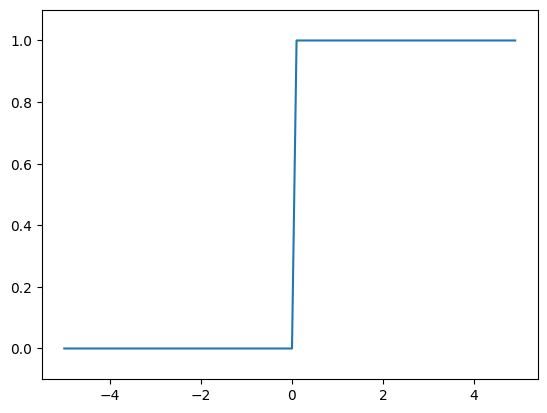

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

+ ```np.arange(start, end, interval)``` == start ~ end 전까지 interval 간격의 넘파이 배열 생성
+ 0을 경계로 0 || 1 출력
+ 계단처럼 생겼기 때문에 '계단함수'라고 불림

##### <br><br><span style="color: mediumaquamarine;">**시그모이드 함수 구현하기**</spen>

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

+ 함수에 넘파이 배열을 처리해줄 넘파이 브로드캐스트가 있다.
    + 브로드캐스트 기능 == 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것 

In [8]:
t = np.array([1.0, 2.0, 3.0])
print("1.0 + t = ", 1.0 + t)
print("1.0 / t = ", 1.0 / t)

1.0 + t =  [2. 3. 4.]
1.0 / t =  [1.         0.5        0.33333333]


+ 스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 결과가 넘파이 배열로 출력됨

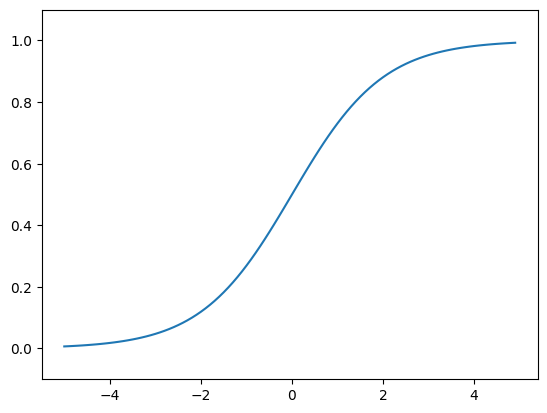

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

+ <spen style="color: gold;">**시그모이드 ( sigmoid )**</spen> = S자 모양

##### <br><br><span style="color: mediumaquamarine;">**시그모이드 함수와 계단 함수 비교**</spen>

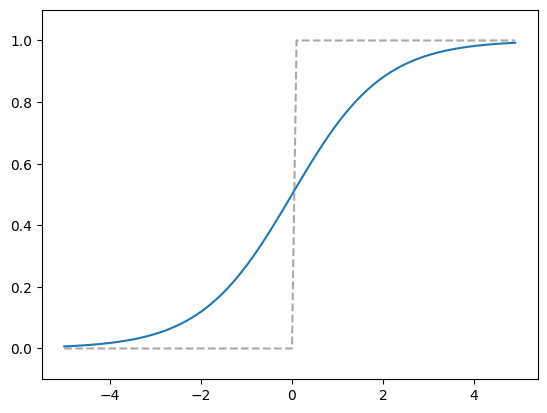

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle='--', color='darkgray')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

<spen style="color: rosybrown;">**차이점**</spen>
+ 매끄러움
    + 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 함
    + 퍼셉트론에서는 뉴런 사이에 0 || 1이 흘렀다면, <spen style="color: palevioletred;">**신경망에서는 연속적인 실수가 흐름**</spen>

<spen style="color: rosybrown;">**공통점**</spen>
+ 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조
    + 계단 함수와 시그모이드 함수는 <spen style="color: palevioletred;">**입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력**</spen>함

##### <br><br><span style="color: mediumaquamarine;">**비선형 함수**</spen>
+ 시그모이드 함수 == 곡선
+ <spen style="color: gold;">**계단 함수**</spen> == 계단처럼 구부러진 직선 || 비선형 함수
</br></br>
+ <spen style="color: gold;">**선형 함수**</spen> == 출력이 입력의 상수배만큼 변하는 함수
    + 때문에 곧은 1개의 직선임
+ <spen style="color: gold;">**비선형 함수**</spen> == '선형이 아닌 함수'
    + 직선 1개로는 그릴 수 없는 함수

+ 신경망에서는 활성화 함수로 비선형 함수를 사용해야함
    + <spen style="color: palevioletred;">**선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문**</spen>
    + 선형 함수의 문제 == <spen style="color: rosybrown;">**층을 아무리 깊게해도 '은닉층이 없는 네트워크'로 똑같은 기능을 구현할 수 있다.**</spen>
        + ex ) 선형 함수인 $h(x) = cx$를 활성화 함수로 사용하는 3층 네트워크
            + $y(x) = h(h(h(x))) ← y(x) = c * c * c * x$ 곱셈을 세번 수행한 식 $y(x) = ax$ <$a = c^3$>
            + 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없음

##### <br><br><span style="color: mediumaquamarine;">**ReLU 함수**</spen>
+ <spen style="color: gold;">**ReLU ( Re ctified Linear Unit < 렐루 >) 함수**</spen> == 입력이 0 초과일 경우 그대로 출력, 입력이 0 이하일 경우 0을 출력하는 함수
+ 신경망 분야에서 오래전부터 시그모이드 함수를 사용해왔으나 최근에는 렐루 함수를 주로 이용함

<img src="../img/relu.png" width="600"></br>
$$
h(x) = 
\begin{cases}
 x (x > 0)\\\\
 0 (x \leq 0)
\end{cases}
$$

In [11]:
def relu(x):
    return np.maximum(0, x)

+ ```maximum()``` == 두 입력 중 큰 값을 선택해 반환하는 함수